# Reddit Social Network Analysis Project

## 1. Introduction

In this notebook, you will scrape data from Reddit using the PRAW (Python Reddit API Wrapper) library, construct a user interaction network, and analyze it using network analysis techniques. You will also conduct a sentiment analysis as well as use regression analysis.

I have provided example code for you. **Students should be creative and add their own unique analysis. Projects that simply execute the code in this notebook will receive lower scores than projects that add to the code.**

## 2. Account and API Setup

### Step 1: Create a Reddit Account
Go to https://www.reddit.com/register and create an account if you don’t already have one.

### Step 2: Create a Reddit API App
1. Visit https://www.reddit.com/prefs/apps
2. Scroll down to "Developed Applications" and click "Create App" or "Create Another App"
3. Fill out the form:
   - **Name**: Any name (e.g., RedditNetworkProject)
   - **App type**: Select "script"
   - **Description**: Type "Reddit Network Analysis by YOUR USERNAME"
   - **Redirect URI**: http://localhost:8080
4. After creation, you’ll see:
   - client_id (under the app name)
   - client_secret
   - user_agent (this is the Description string you defined in step 3 above)

## 3. Install and Import Required Libraries

In [ ]:
!pip install praw networkx

## 3A. Create a .py File to Store Your Secret Credentials

In [ ]:
%%writefile credentials.py

REDDIT_CLIENT_ID = 'aZZc-f0lIIV6mecaQo8zAg' #fill in your client id here
REDDIT_CLIENT_SECRET = '5cLtM2Rbi56zi45GaRPAf5QSjje3WA' #fill in your client_secret here
REDDIT_USER_AGENT = 'Reddit Network Analysis by Substantial-Lab-8876' #fill in your app description here

Overwriting credentials.py


In [ ]:
import praw
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import credentials  # This will import your secrets as attributes

client_id = credentials.REDDIT_CLIENT_ID
client_secret = credentials.REDDIT_CLIENT_SECRET
user_agent = credentials.REDDIT_USER_AGENT

## 4. Set Up API Access

Fill in your credentials in the following cell. **Do not share your credentials publicly.**

In [ ]:
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

## 5. Scrape Reddit Data

We will scrape the top 100 posts and their comments from a subreddit.

In [ ]:
# Set your subreddit
subreddit_name = "RealHousewives"
subreddit = reddit.subreddit(subreddit_name)

# Collect top 100 posts from the past month
posts = []
comments = []

for submission in subreddit.top(time_filter='month', limit=100):
    submission.comments.replace_more(limit=0)  # Flatten all nested comments

    # Store post info
    posts.append({
        'post_id': submission.id,
        'title': submission.title,
        'score': submission.score,
        'author': str(submission.author),
        'created_utc': submission.created_utc
    })

    # Store comment info
    for comment in submission.comments.list():
        comments.append({
            'post_id': submission.id,
            'comment_id': comment.id,
            'parent_id': comment.parent_id,
            'author': str(comment.author),
            'body': comment.body,
            'created_utc': comment.created_utc
        })

# Convert to DataFrames
posts_df = pd.DataFrame(posts)
comments_df = pd.DataFrame(comments)

# Format time
posts_df['created_date'] = pd.to_datetime(posts_df['created_utc'], unit='s')
comments_df['created_date'] = pd.to_datetime(comments_df['created_utc'], unit='s')

# Preview
print("Posts:")
display(posts_df.head())

print("Comments:")
display(comments_df.head())


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Now collect comments from those posts.

In [ ]:
from datetime import datetime

comments = []

# Loop over the post IDs already collected
for post_id in posts_df['post_id']:  # <- NOTE: use 'post_id', not 'id' from DataFrame!
    submission = reddit.submission(id=post_id)
    submission.comments.replace_more(limit=0)

    for comment in submission.comments.list():
        comments.append({
            'post_id': post_id,
            'comment_id': comment.id,
            'parent_id': comment.parent_id,
            'author': str(comment.author),
            'body': comment.body,
            'created_utc': datetime.utcfromtimestamp(comment.created_utc)
        })

# Convert to DataFrame
comments_df = pd.DataFrame(comments)

# Preview
comments_df.head()



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

post_id comment_id   parent_id                author  \
0  1k0mhs8    mnf3iht  t3_1k0mhs8         AutoModerator   
1  1k0mhs8    mng7rl0  t3_1k0mhs8           Lolita_says   
2  1k0mhs8    mnh172k  t3_1k0mhs8       Pineapple_Wagon   
3  1k0mhs8    mni90az  t3_1k0mhs8              hariboho   
4  1k0mhs8    mnhcdw1  t3_1k0mhs8  Spiritual-Border2195   

                                                body         created_utc  
0  Please remember to follow the rules of the sub... 2025-04-16 14:58:16  
1  I now understand why Garcelle didn’t speak to ... 2025-04-16 18:13:45  
2  What’s makes me mad about Sutton is she had a ... 2025-04-16 20:41:24  
3  I grew to like Sutton, mainly through my love ... 2025-04-17 00:47:58  
4  Sutton is like that outcast who is so pitiful ... 2025-04-16 21:39:12

## 6. Build the Social Network

Create a directed graph where an edge from user A to user B indicates A replied to B.

In [ ]:
import networkx as nx

# Create directed graph: A replies to B => edge from A → B
G = nx.DiGraph()

# Optional: make a fast lookup table of comment_id → author
id_to_author = comments_df.set_index('comment_id')['author'].to_dict()

# Loop through each comment
for _, row in comments_df.iterrows():
    source = row['author']
    parent_id_full = row['parent_id']

    # Only proceed if replying to another comment (not post)
    if parent_id_full.startswith('t1_'):
        parent_id = parent_id_full[3:]  # remove 't1_' prefix

        # Get the parent comment’s author (target)
        target = id_to_author.get(parent_id, None)

        # Check for valid users
        if source not in [None, '[deleted]', 'AutoModerator'] and \
           target not in [None, '[deleted]', 'AutoModerator'] and \
           source != target:

            # Add edge: source replied to target
            G.add_edge(source, target)

print(f"Total users (nodes): {G.number_of_nodes()}")
print(f"Total replies (edges): {G.number_of_edges()}")
print(G)

Total users (nodes): 2848
Total replies (edges): 5515
DiGraph with 2848 nodes and 5515 edges


## **visualization with the top 50 users**
not the whole network due to it being huge, it would look a mess and be too intertwined to understand


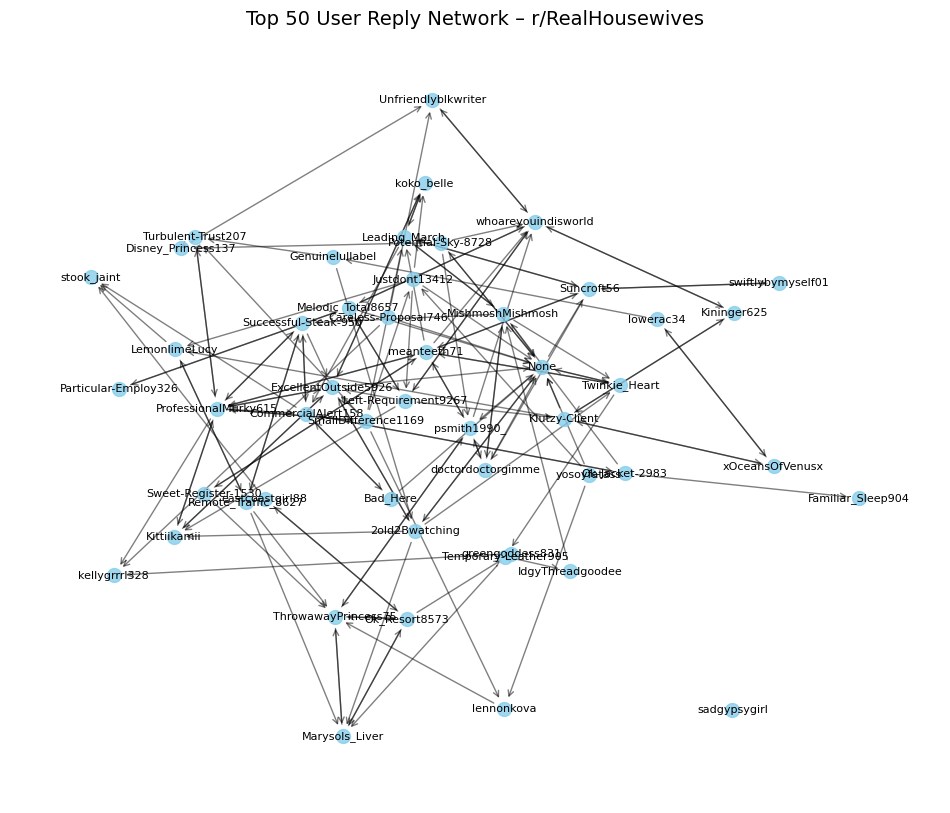

In [ ]:
# Get top 50 users by total degree (in + out)
top_users = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_nodes = [user for user, deg in top_users]

# Create subgraph
G_top = G.subgraph(top_nodes)

# Visualize
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_top, k=0.6)

nx.draw_networkx_nodes(G_top, pos, node_size=100, alpha=0.8, node_color='skyblue')
nx.draw_networkx_edges(G_top, pos, alpha=0.5, arrows=True, arrowstyle='->')
nx.draw_networkx_labels(G_top, pos, font_size=8)

plt.title("Top 50 User Reply Network – r/RealHousewives", fontsize=14)
plt.axis('off')
plt.show()


## 7. Analyze Network Metrics

Calculate centrality and clustering measures.

In [ ]:
# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
clustering_coeff = nx.clustering(G.to_undirected())  # clustering only defined for undirected graphs

# Sort for top users
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Display top influencers
print("Top 5 users by degree centrality:")
for user, score in sorted_degree[:5]:
    print(f"{user}: {score:.4f}")

print("\nTop 5 users by betweenness centrality:")
for user, score in sorted_betweenness[:5]:
    print(f"{user}: {score:.4f}")


##building a dataframe with all the metrics##
# Create combined DataFrame
metrics_df = pd.DataFrame({
    'user': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality.values()),
    'clustering_coeff': [clustering_coeff.get(user, 0) for user in degree_centrality.keys()]
})

metrics_df.sort_values('degree_centrality', ascending=False).head()


Top 5 users by degree centrality:
None: 0.0509
LemonlimeLucy: 0.0246
Particular-Employ326: 0.0235
Melodic_Total8657: 0.0218
greengoddess831: 0.0179

Top 5 users by betweenness centrality:
None: 0.0934
Melodic_Total8657: 0.0288
LemonlimeLucy: 0.0251
Leading_March: 0.0246
whoareyouindisworld: 0.0227


user  degree_centrality  betweenness_centrality  \
331                   None           0.050931                0.093425   
426          LemonlimeLucy           0.024587                0.025081   
2519  Particular-Employ326           0.023534                0.019012   
625      Melodic_Total8657           0.021777                0.028754   
589        greengoddess831           0.017914                0.016344   

      clustering_coeff  
331           0.005555  
426           0.012821  
2519          0.001880  
625           0.005285  
589           0.010256

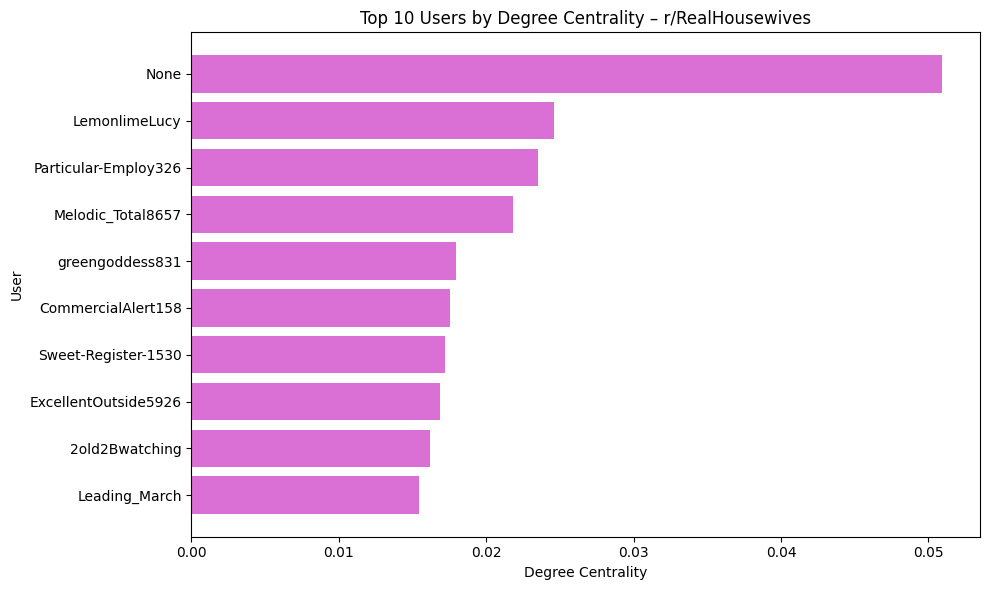

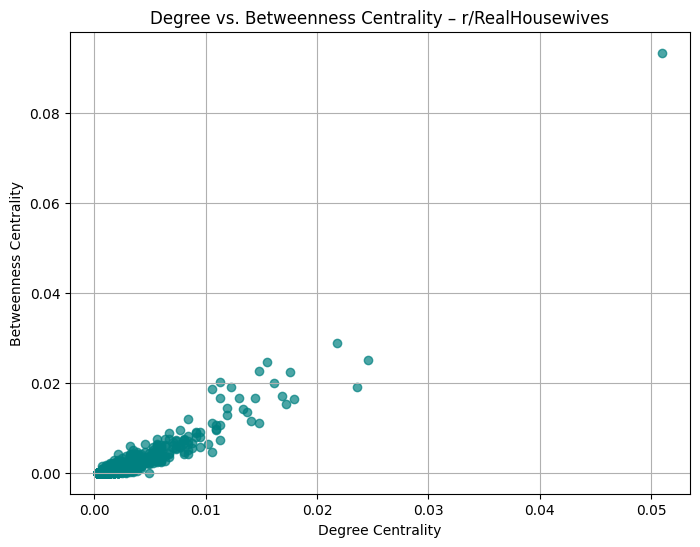

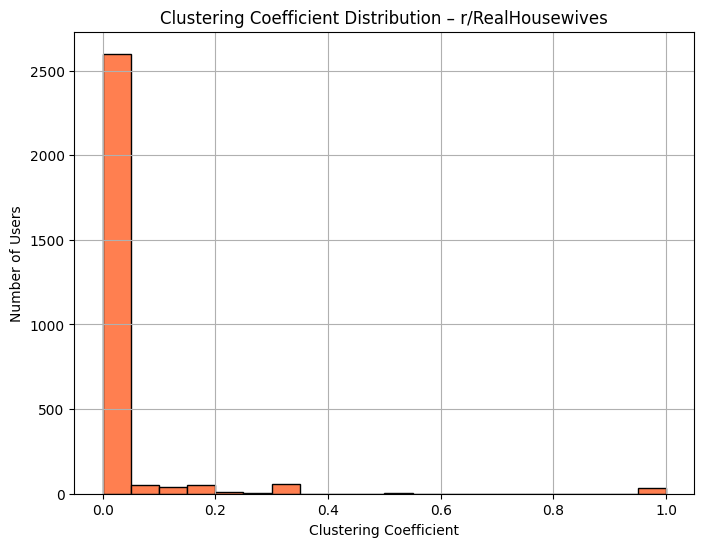

In [ ]:
##visualizations#
top10 = metrics_df.sort_values('degree_centrality', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10['user'], top10['degree_centrality'], color='orchid')
plt.gca().invert_yaxis()
plt.title("Top 10 Users by Degree Centrality – r/RealHousewives")
plt.xlabel("Degree Centrality")
plt.ylabel("User")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(
    metrics_df['degree_centrality'],
    metrics_df['betweenness_centrality'],
    alpha=0.7,
    color='teal'
)
plt.title("Degree vs. Betweenness Centrality – r/RealHousewives")
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(metrics_df['clustering_coeff'], bins=20, color='coral', edgecolor='black')
plt.title("Clustering Coefficient Distribution – r/RealHousewives")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()



## 8. Visualize the Network

We will use a spring layout to visualize the network structure.

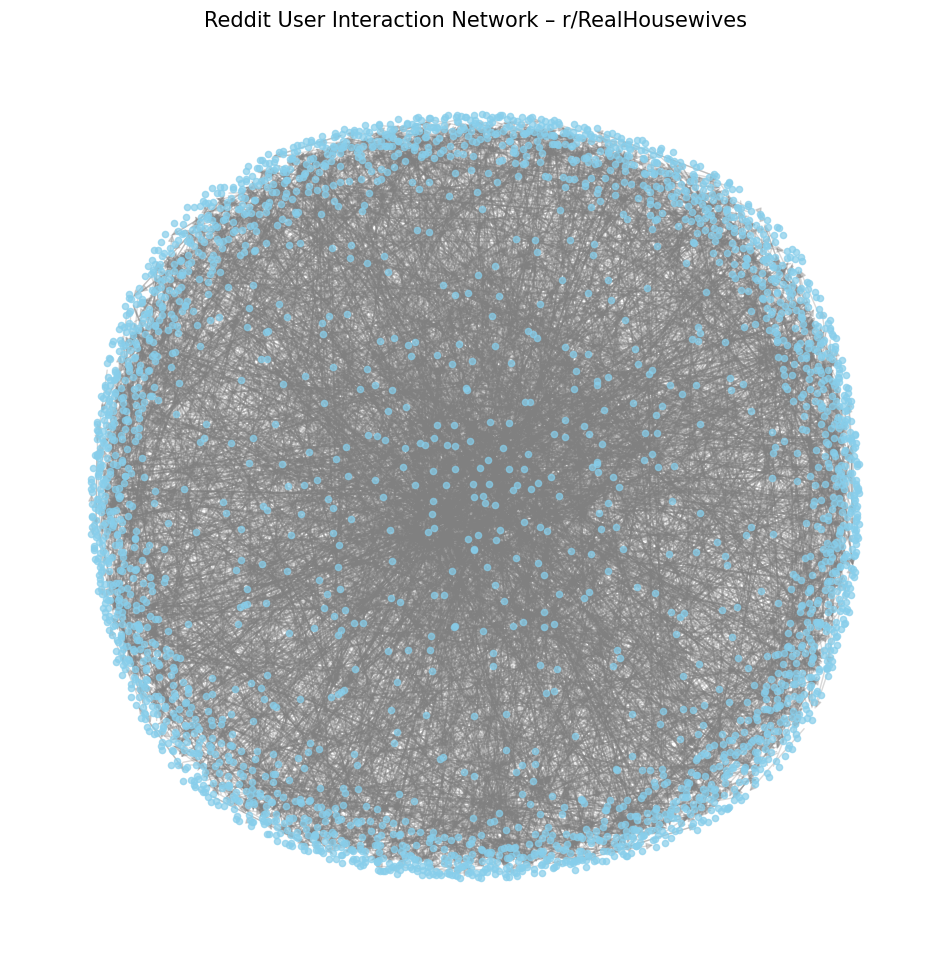

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Spring layout uses a force-directed algorithm for positioning
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=20, alpha=0.7, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

plt.title("Reddit User Interaction Network – r/RealHousewives", fontsize=15)
plt.axis('off')
plt.show()


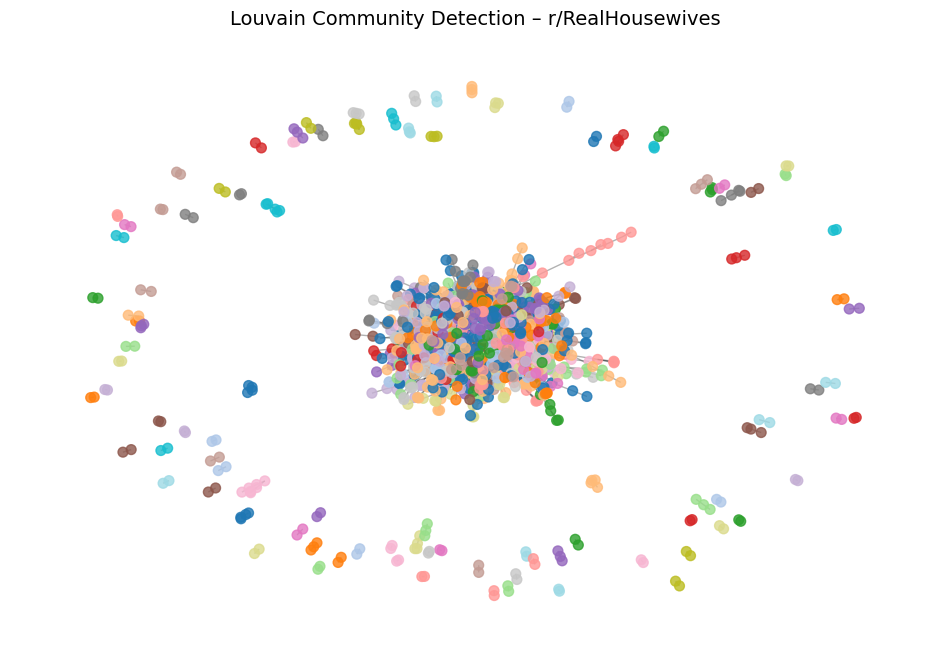

In [ ]:
import networkx as nx
import community as community_louvain  # This is the python-louvain package
import matplotlib.pyplot as plt

# Convert to undirected graph (Louvain needs this)
G_undirected = G.to_undirected()

# Run Louvain community detection
partition = community_louvain.best_partition(G_undirected)

# Assign community ID to each node
nx.set_node_attributes(G_undirected, partition, 'community')

# Layout
pos = nx.spring_layout(G_undirected, seed=42)

# Color nodes by community ID
node_colors = [partition[node] for node in G_undirected.nodes()]

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(
    G_undirected, pos,
    node_color=node_colors,
    cmap=plt.cm.tab20,
    node_size=50,
    alpha=0.8
)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)

plt.title("Louvain Community Detection – r/RealHousewives", fontsize=14)
plt.axis("off")
plt.show()


Top 10 Users by Degree Centrality:
None: 0.0429
Particular-Employ326: 0.0200
LemonlimeLucy: 0.0183
CommercialAlert158: 0.0158
Melodic_Total8657: 0.0155
greengoddess831: 0.0141
Justdont13412: 0.0126
ExcellentOutside5926: 0.0119
2old2Bwatching: 0.0116
Sweet-Register-1530: 0.0116


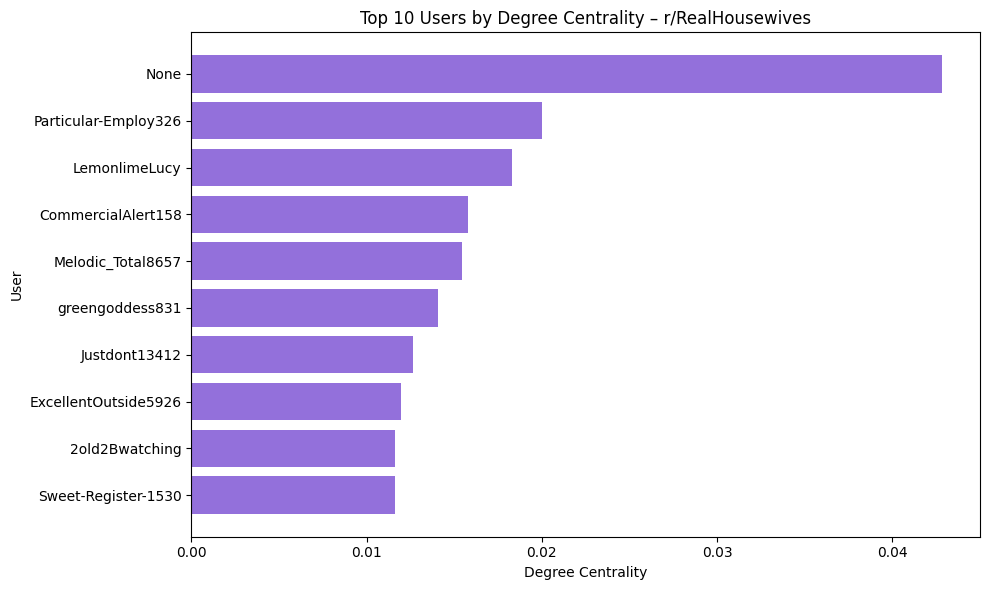

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate degree centrality (on undirected graph)
degree_centrality = nx.degree_centrality(G_undirected)

# Sort and get top 10 users
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results
print("Top 10 Users by Degree Centrality:")
for user, score in top_degree:
    user_display = user if user not in [None, '[deleted]'] else "(unknown)"
    print(f"{user_display}: {score:.4f}")

# Create a DataFrame (optional, useful for merging later)
top_degree_df = pd.DataFrame(top_degree, columns=['user', 'degree_centrality'])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_degree_df['user'], top_degree_df['degree_centrality'], color='mediumpurple')
plt.xlabel("Degree Centrality")
plt.ylabel("User")
plt.title("Top 10 Users by Degree Centrality – r/RealHousewives")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


Top 10 Users by Betweenness Centrality:
None: 0.2057
CommercialAlert158: 0.0518
LemonlimeLucy: 0.0508
Particular-Employ326: 0.0476
Melodic_Total8657: 0.0459
greengoddess831: 0.0341
Justdont13412: 0.0338
whoareyouindisworld: 0.0324
Klutzy-Client: 0.0318
Leading_March: 0.0306


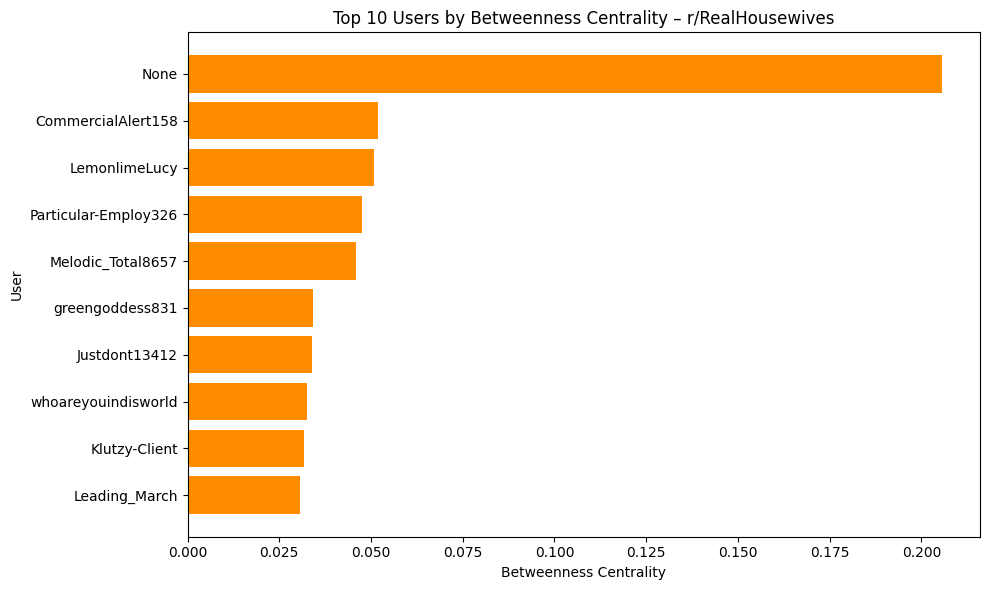

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_undirected)

# Get top 10 users
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results
print("Top 10 Users by Betweenness Centrality:")
for user, score in top_betweenness:
    user_display = user if user not in [None, '[deleted]'] else "(unknown)"
    print(f"{user_display}: {score:.4f}")

# Convert to DataFrame
top_betweenness_df = pd.DataFrame(top_betweenness, columns=['user', 'betweenness_centrality'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_betweenness_df['user'], top_betweenness_df['betweenness_centrality'], color='darkorange')
plt.xlabel("Betweenness Centrality")
plt.ylabel("User")
plt.title("Top 10 Users by Betweenness Centrality – r/RealHousewives")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



🔝 Top 10 Users by Eigenvector Centrality:
None: 0.5717
Melodic_Total8657: 0.1254
Justdont13412: 0.1235
ExcellentOutside5926: 0.1207
2old2Bwatching: 0.1206
Twinkie_Heart: 0.1130
psmith1990_: 0.1123
Potential-Sky-8728: 0.1051
Klutzy-Client: 0.1044
Suncroft56: 0.0991


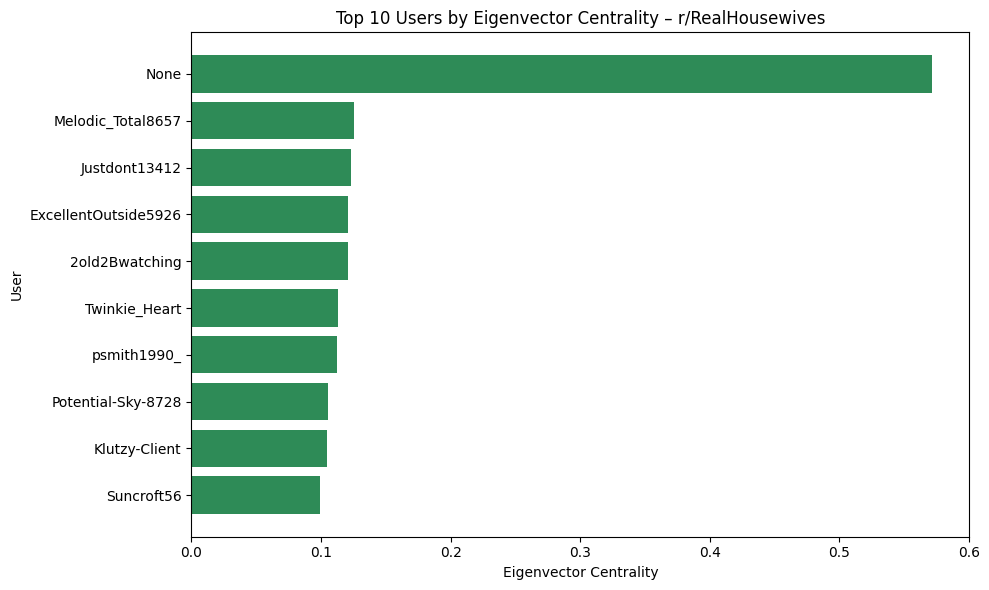

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Compute eigenvector centrality (can take time — adjust max_iter if needed)
eigenvector_centrality = nx.eigenvector_centrality(G_undirected, max_iter=1000)

# Get top 10 users
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results
print("🔝 Top 10 Users by Eigenvector Centrality:")
for user, score in top_eigenvector:
    user_display = user if user not in [None, '[deleted]'] else "(unknown)"
    print(f"{user_display}: {score:.4f}")

# Convert to DataFrame
top_eigenvector_df = pd.DataFrame(top_eigenvector, columns=['user', 'eigenvector_centrality'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_eigenvector_df['user'], top_eigenvector_df['eigenvector_centrality'], color='seagreen')
plt.xlabel("Eigenvector Centrality")
plt.ylabel("User")
plt.title("Top 10 Users by Eigenvector Centrality – r/RealHousewives")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



Top 10 Users by PageRank:
None: 0.0102
Particular-Employ326: 0.0054
LemonlimeLucy: 0.0044
CommercialAlert158: 0.0041
Melodic_Total8657: 0.0037
greengoddess831: 0.0035
Justdont13412: 0.0031
Turbulent-Trust207: 0.0029
Sweet-Register-1530: 0.0029
Leading_March: 0.0028


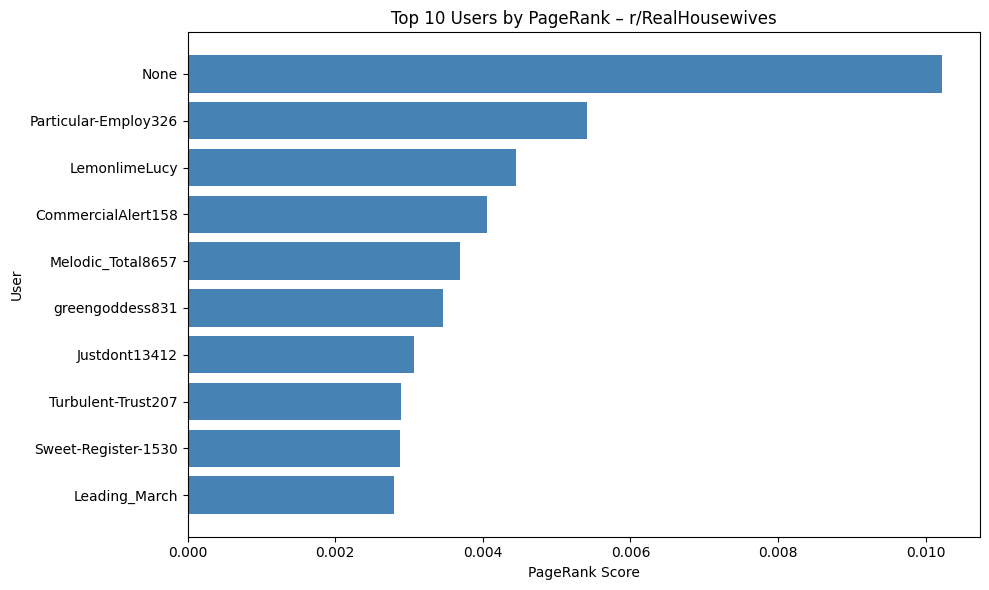

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate PageRank
pagerank_scores = nx.pagerank(G_undirected)

# Get top 10 users
top_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Print nicely
print("Top 10 Users by PageRank:")
for user, score in top_pagerank:
    user_display = user if user not in [None, '[deleted]'] else "(unknown)"
    print(f"{user_display}: {score:.4f}")

# Convert to DataFrame
top_pagerank_df = pd.DataFrame(top_pagerank, columns=['user', 'pagerank'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_pagerank_df['user'], top_pagerank_df['pagerank'], color='steelblue')
plt.xlabel("PageRank Score")
plt.ylabel("User")
plt.title("Top 10 Users by PageRank – r/RealHousewives")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



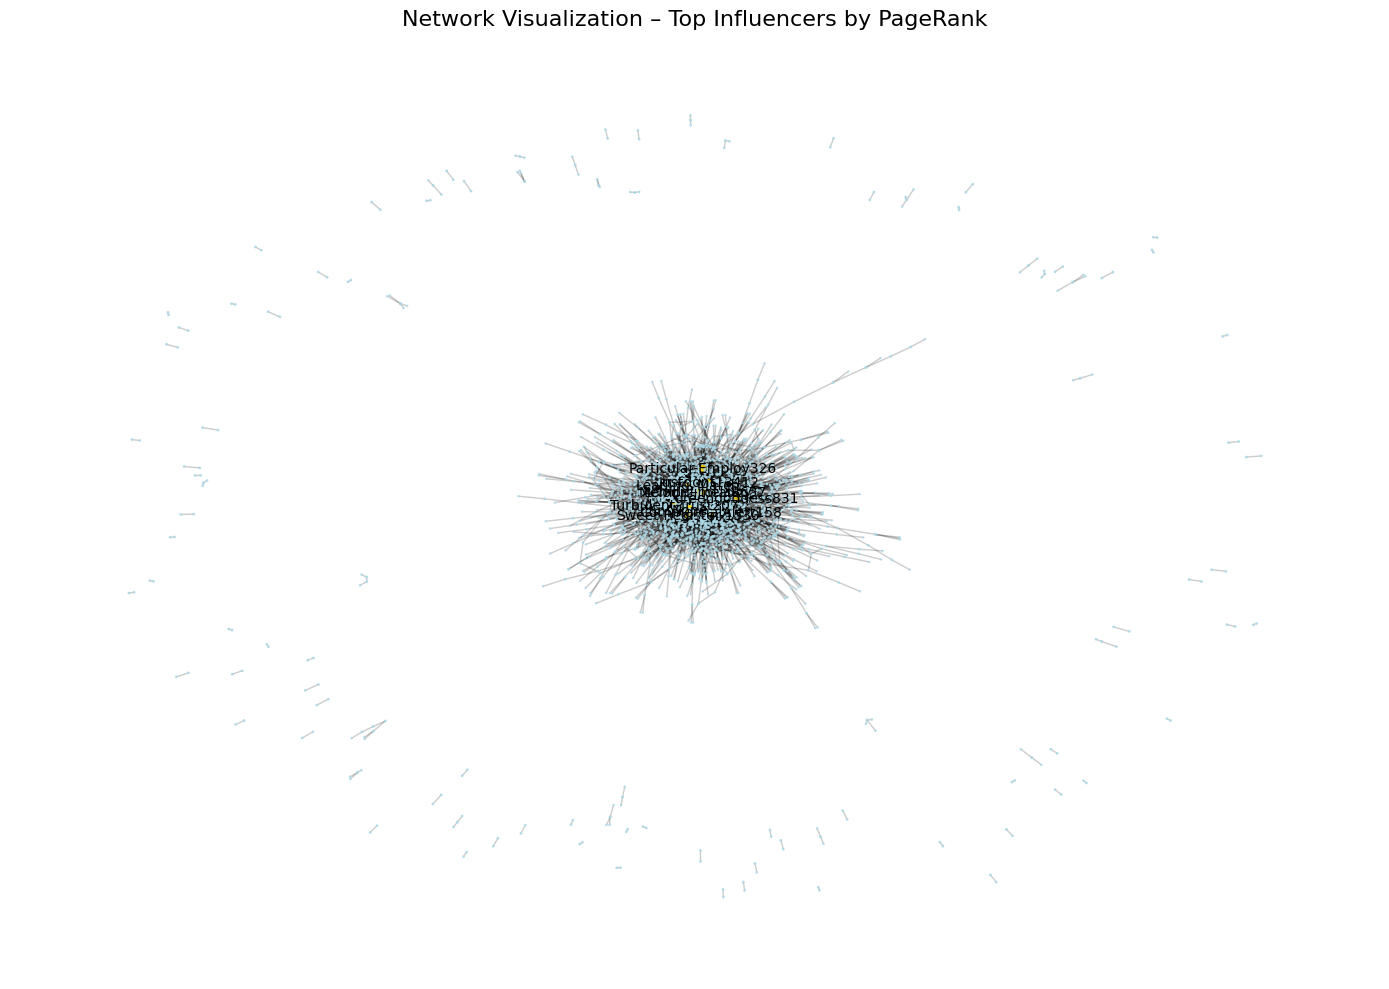

In [ ]:
import matplotlib.pyplot as plt

# Number of top influencers to label
top_n = 10

# Sort and get top N users by PageRank
top_users = dict(sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:top_n])

# Positioning layout (spring layout, deterministic with seed)
pos = nx.spring_layout(G_undirected, seed=42)

# Scale all node sizes by PageRank
sizes = [pagerank_scores.get(node, 0) * 3000 for node in G_undirected.nodes()]

# Color: optional highlight for top users
colors = ['gold' if node in top_users else 'lightblue' for node in G_undirected.nodes()]

# Start plot
plt.figure(figsize=(14, 10))

# Draw nodes with scaled sizes and optional highlight
nx.draw_networkx_nodes(G_undirected, pos, node_size=sizes, node_color=colors, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G_undirected, pos, alpha=0.2)

# Label only top N users
labels = {node: node for node in top_users}
nx.draw_networkx_labels(G_undirected, pos, labels=labels, font_size=10, font_color='black')

# Final formatting
plt.title("Network Visualization – Top Influencers by PageRank", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()



# 9. Sentiment Analysis

In [ ]:
!pip install textblob

Most Positive Users:


author  sentiment
1197           MeiLing_Wow        1.0
57    Acrobatic-Evidence-7        1.0
2130             WhoWhaaaa        1.0
28        69isNotThatGreat        1.0
2144           Wish-Either        1.0

Most Negative Users:


author  sentiment
1830        SoMuchDrama10       -1.0
3427           skm7777777       -1.0
3399            septvirgo       -1.0
3559  thiswasamistake00ps       -1.0
2459            cmt112699       -1.0

author  sentiment
1197           MeiLing_Wow        1.0
57    Acrobatic-Evidence-7        1.0
2130             WhoWhaaaa        1.0
28        69isNotThatGreat        1.0
2144           Wish-Either        1.0
1981          TheGoodSouls        1.0
453       DeAnnaBroome1970        1.0
423          CupofTea-cher        1.0
2143   Wise_Yesterday_7496        1.0
2164              YoKinaZu        1.0

author  sentiment  comment_count
2228  alsoaprettybigdeal   0.828125              2
2865           jsmalltri   0.718750              2
2562          drtoboggon   0.716667              2
1169            Marie036   0.707870              3
3548  themiddlechildedit   0.687500              2
1296           Myrmidden   0.650000              2
3603        unchampignon   0.606250              2
2605             erabera   0.600000              2
3304             raletti   0.600000              2
2876          justinizer   0.600000              2

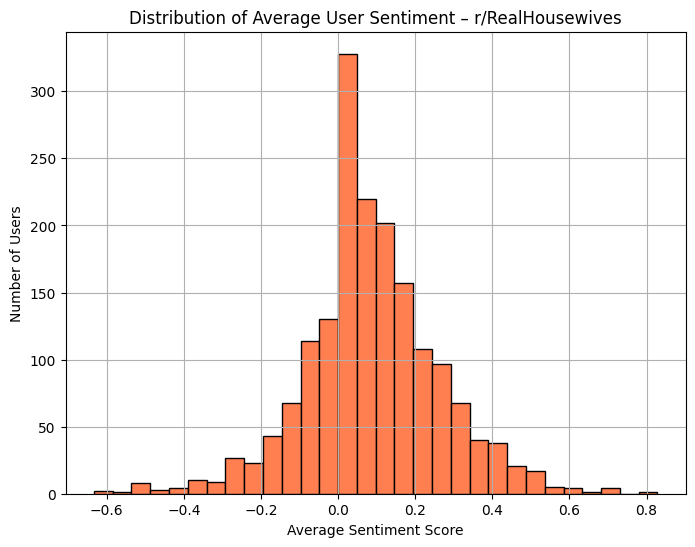

In [ ]:

from textblob import TextBlob
import pandas as pd

# Function to compute sentiment safely
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return 0  # Neutral for missing or deleted text
    return TextBlob(text).sentiment.polarity

# Apply to each comment
comments_df['sentiment'] = comments_df['body'].apply(get_sentiment)

# Aggregate: average sentiment per author
sentiment_df = comments_df.groupby('author', as_index=False)['sentiment'].mean()

# Remove deleted or unknown users
sentiment_df = sentiment_df[~sentiment_df['author'].isin(['[deleted]', 'AutoModerator', None])]

# Preview top positive and negative users
print("Most Positive Users:")
display(sentiment_df.sort_values('sentiment', ascending=False).head())

print("Most Negative Users:")
display(sentiment_df.sort_values('sentiment', ascending=True).head())

# Sort by sentiment descending for top positive users
sentiment_df_sorted = sentiment_df.sort_values(by='sentiment', ascending=False)

# Display first 10 users
import pandas as pd
pd.set_option('display.max_rows', 10)  # show up to 10 rows in notebook display
display(sentiment_df_sorted.head(10))

# Count comments per author
comment_counts = comments_df['author'].value_counts().reset_index()
comment_counts.columns = ['author', 'comment_count']

# Merge with sentiment
sentiment_df = sentiment_df.merge(comment_counts, on='author')

# Filter to users with more than 1 comment
sentiment_df_filtered = sentiment_df[sentiment_df['comment_count'] > 1]

# Display top 10 positive users with >1 comment
display(sentiment_df_filtered.sort_values('sentiment', ascending=False).head(10))

#visualization#
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(sentiment_df_filtered['sentiment'], bins=30, color='coral', edgecolor='black')
plt.title("Distribution of Average User Sentiment – r/RealHousewives")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()




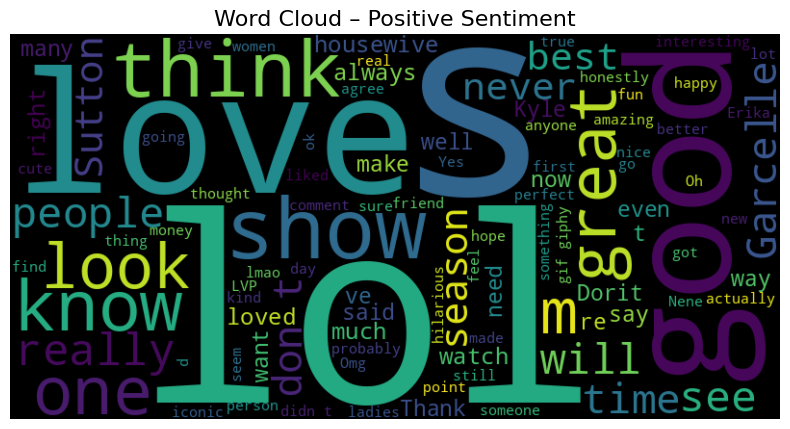

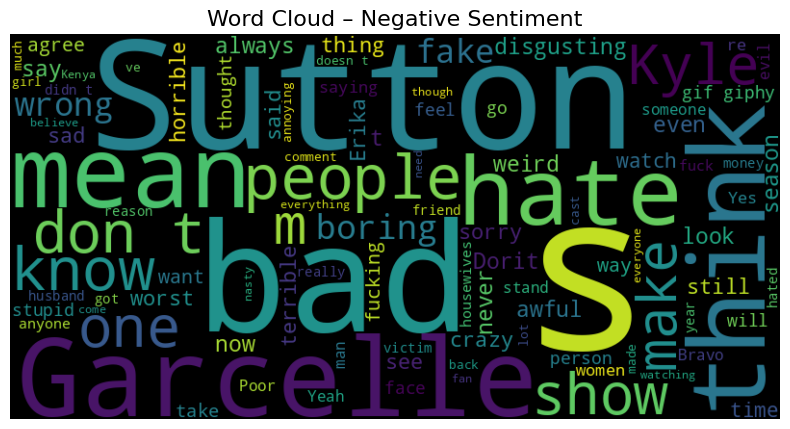

In [ ]:
# Filter positive comments
positive_comments = comments_df[comments_df['sentiment'] > 0.3]  # threshold can be adjusted

# Join all comment text into one big string
positive_text = " ".join(positive_comments['body'].dropna().astype(str))

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine built-in stopwords with any custom ones
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["https", "http", "reddit", "com", "amp"])  # optional additions

# Optional parameters
wordcloud_config = {
    "width": 800,
    "height": 400,
    "background_color": "black",  # can also try "white", "lightgray"
    "stopwords": custom_stopwords,
    "max_words": 100,  # display only the top 100 words
    "colormap": "viridis"  # alternatives: "plasma", "magma", "inferno", etc.
}

# Word Cloud for Positive Sentiment
wordcloud_pos = WordCloud(**wordcloud_config).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Positive Sentiment", fontsize=16)
plt.show()

# Negative word cloud setup
negative_comments = comments_df[comments_df['sentiment'] < -0.3]
negative_text = " ".join(negative_comments['body'].dropna().astype(str))

# Generate and display
wordcloud_neg = WordCloud(**wordcloud_config).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Negative Sentiment", fontsize=16)
plt.show()



In [ ]:
positive_comments = comments_df[comments_df['sentiment'] > 0]['body']
negative_comments = comments_df[comments_df['sentiment'] < 0]['body']

In [ ]:
positive_text = " ".join(positive_comments.dropna().tolist())
negative_text = " ".join(negative_comments.dropna().tolist())

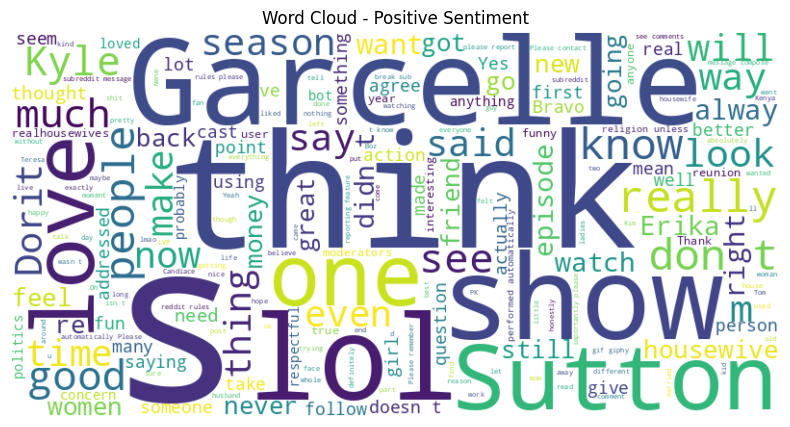

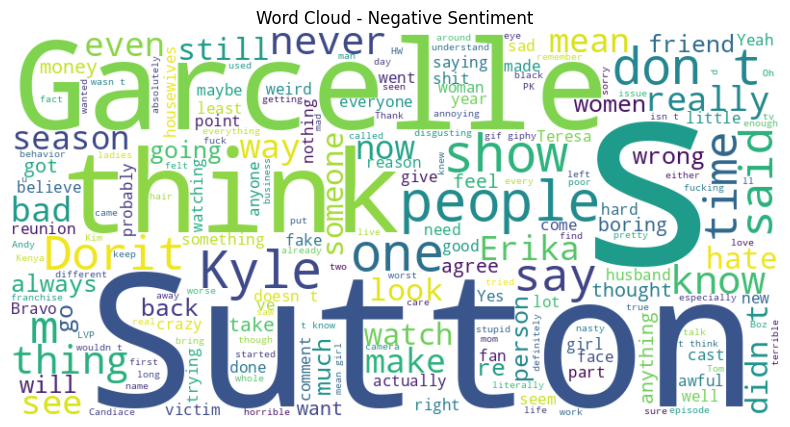

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for positive sentiment
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Sentiment")
plt.show()

# Word cloud for negative sentiment
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Sentiment")
plt.show()


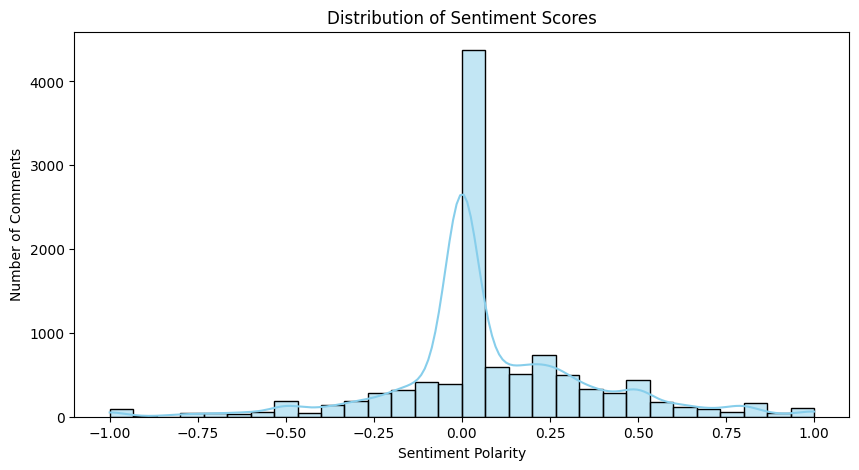

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(comments_df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Comments")
plt.show()


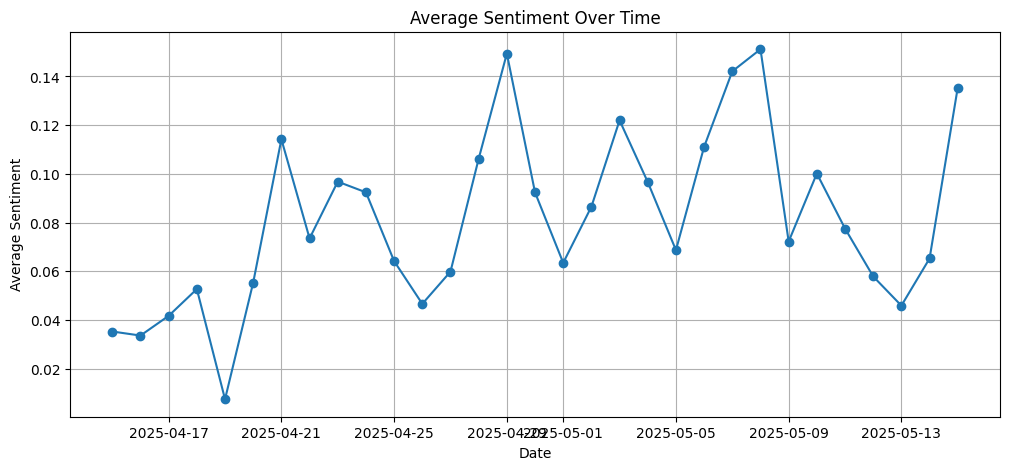

In [ ]:
comments_df.rename(columns={'created_utc': 'timestamp'}, inplace=True) #rename column
comments_df['timestamp'] = pd.to_datetime(comments_df['timestamp'])  # Ensure it's datetime
daily_sentiment = comments_df.groupby(comments_df['timestamp'].dt.date)['sentiment'].mean()

plt.figure(figsize=(12, 5))
daily_sentiment.plot(marker='o')
plt.title("Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.grid(True)
plt.show()


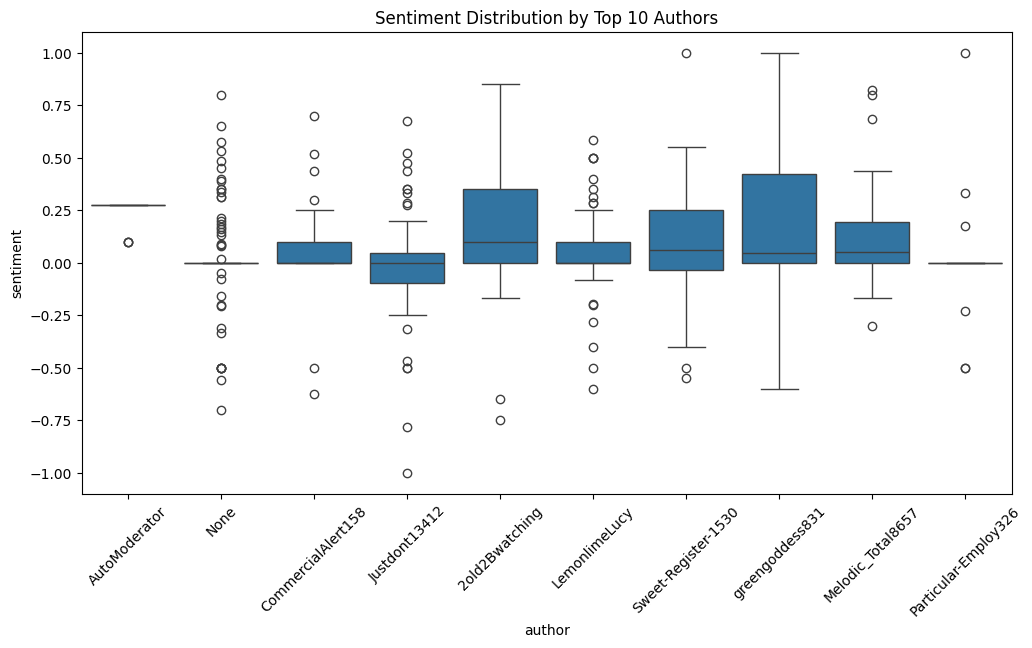

In [ ]:
top_authors = comments_df['author'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=comments_df[comments_df['author'].isin(top_authors)], x='author', y='sentiment')
plt.title("Sentiment Distribution by Top 10 Authors")
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-1192b21ecbe8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_counts = comments_df.groupby(['sentiment_bin']).size().reset_index(name='count')


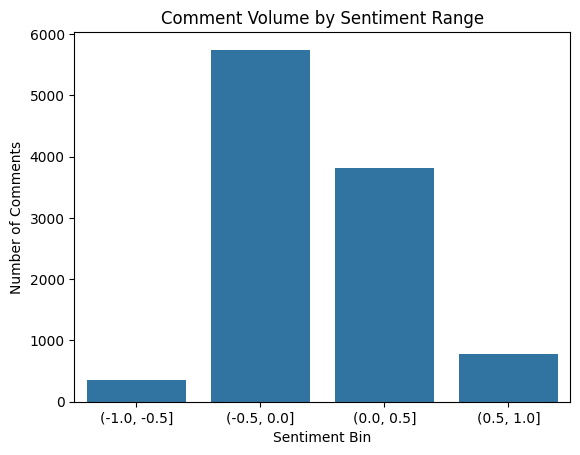

In [ ]:
comments_df['sentiment_bin'] = pd.cut(comments_df['sentiment'], bins=[-1, -0.5, 0, 0.5, 1])
sentiment_counts = comments_df.groupby(['sentiment_bin']).size().reset_index(name='count')

sns.barplot(x='sentiment_bin', y='count', data=sentiment_counts)
plt.title("Comment Volume by Sentiment Range")
plt.ylabel("Number of Comments")
plt.xlabel("Sentiment Bin")
plt.show()


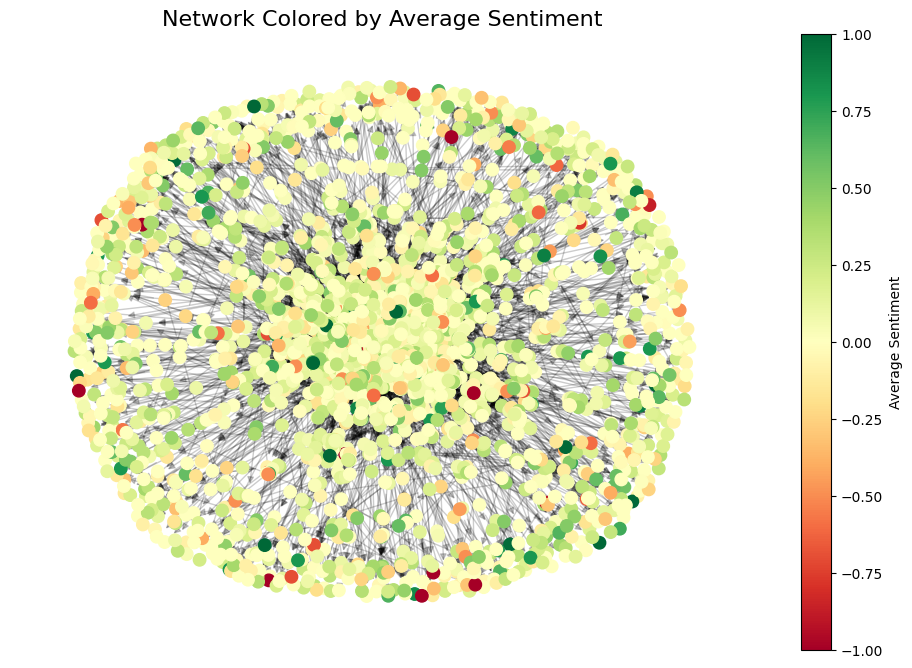

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

#Add sentiment to graph nodes
avg_sentiment = comments_df.groupby('author')['sentiment'].mean().to_dict()
for node in G.nodes():
    G.nodes[node]['sentiment'] = avg_sentiment.get(node, 0)

#Prepare color values and normalize
node_colors = [G.nodes[node]['sentiment'] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)

norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
cmap = cm.RdYlGn
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar

#Plot with axis handle
fig, ax = plt.subplots(figsize=(12, 8))

# Draw graph
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=80, ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

# Colorbar linked to the same axis
cbar = fig.colorbar(sm, ax=ax, label="Average Sentiment")

# Finalize plot
ax.set_title("Network Colored by Average Sentiment", fontsize=16)
ax.axis('off')
plt.show()



## 10. Regression Analysis

In [ ]:
# Assuming you have these centrality dictionaries from your network graph
user_df = pd.DataFrame({
    'username': list(pagerank_scores.keys()),
    'pagerank': list(pagerank_scores.values()),
    'degree_centrality': [degree_centrality.get(u, 0) for u in pagerank_scores.keys()],
    'betweenness': [betweenness_centrality.get(u, 0) for u in pagerank_scores.keys()],
    'eigenvector': [eigenvector_centrality.get(u, 0) for u in pagerank_scores.keys()],
})

# Add average sentiment per user
user_sentiment = comments_df.groupby('author')['sentiment'].mean()
user_df['avg_sentiment'] = user_df['username'].map(user_sentiment).fillna(0)

# Define influencer status (top 10% by PageRank)
threshold = user_df['pagerank'].quantile(0.90)
user_df['is_influencer'] = (user_df['pagerank'] >= threshold).astype(int)


                            OLS Regression Results                            
Dep. Variable:          avg_sentiment   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.045
Date:                Thu, 15 May 2025   Prob (F-statistic):              0.371
Time:                        20:01:54   Log-Likelihood:                 78.535
No. Observations:                2847   AIC:                            -149.1
Df Residuals:                    2843   BIC:                            -125.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0915      0.00

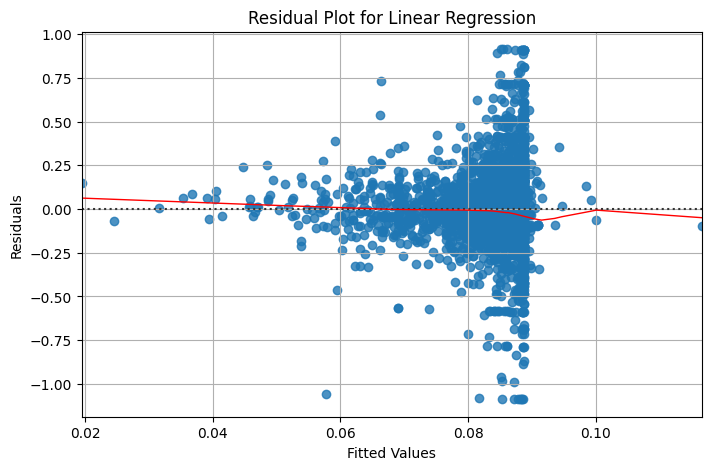

0         1
const               0.078493  0.104473
degree_centrality -20.155459  4.671154
betweenness        -1.510586  7.405699
eigenvector        -1.295121  0.423038

In [ ]:
import statsmodels.api as sm

X_lin = user_df[['degree_centrality', 'betweenness', 'eigenvector']]
y_lin = user_df['avg_sentiment']

# Add intercept
X_lin = sm.add_constant(X_lin)

# Fit linear regression
linear_model = sm.OLS(y_lin, X_lin).fit()
print(linear_model.summary())
print(user_df[['avg_sentiment', 'degree_centrality', 'betweenness', 'eigenvector']].describe())
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
residuals = linear_model.resid
fitted = linear_model.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red", "lw": 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.grid(True)
plt.show()
linear_model.params  # Coefficients
linear_model.conf_int()  # Confidence intervals



Optimization terminated successfully.
         Current function value: 0.050802
         Iterations 13
                          Probit Regression Results                           
Dep. Variable:          is_influencer   No. Observations:                 2847
Model:                         Probit   Df Residuals:                     2842
Method:                           MLE   Df Model:                            4
Date:                Thu, 15 May 2025   Pseudo R-squ.:                  0.8438
Time:                        20:04:44   Log-Likelihood:                -144.63
converged:                       True   LL-Null:                       -926.17
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.2826      0.328    -16.120      0.000      -5.925      -4.640
degree_

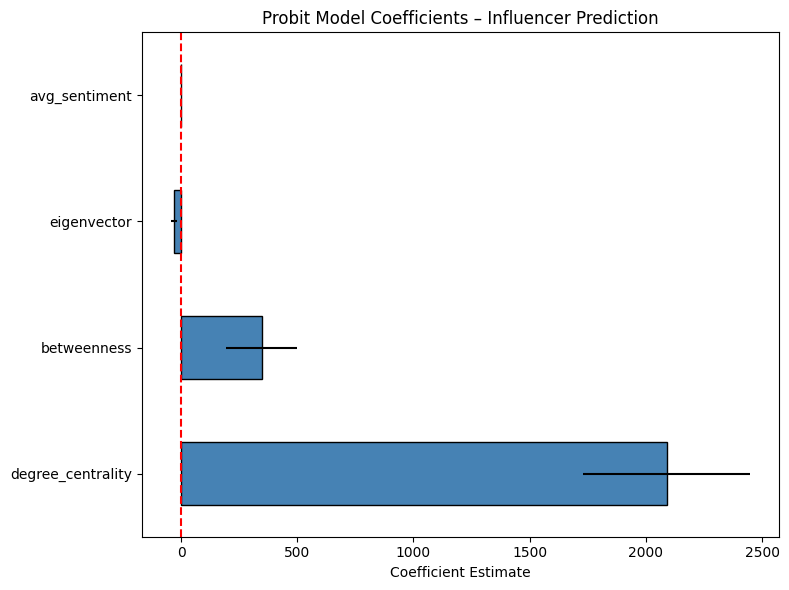

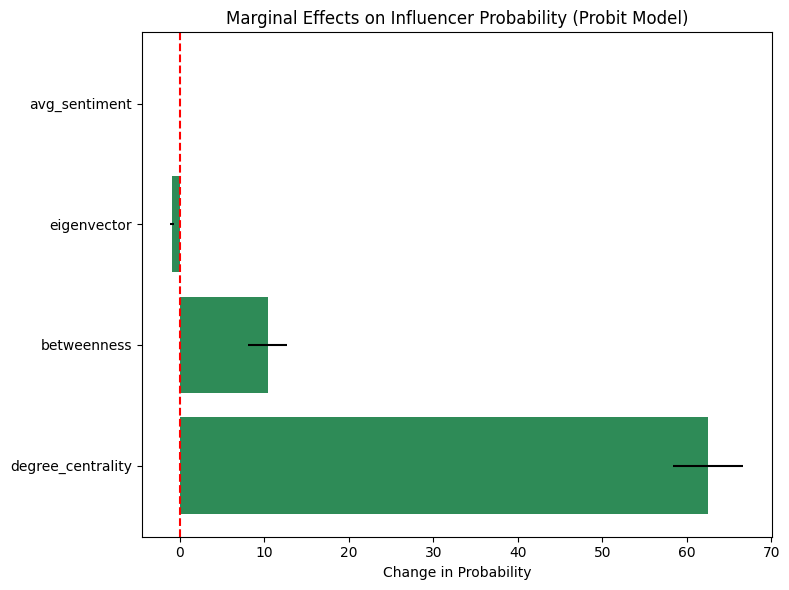

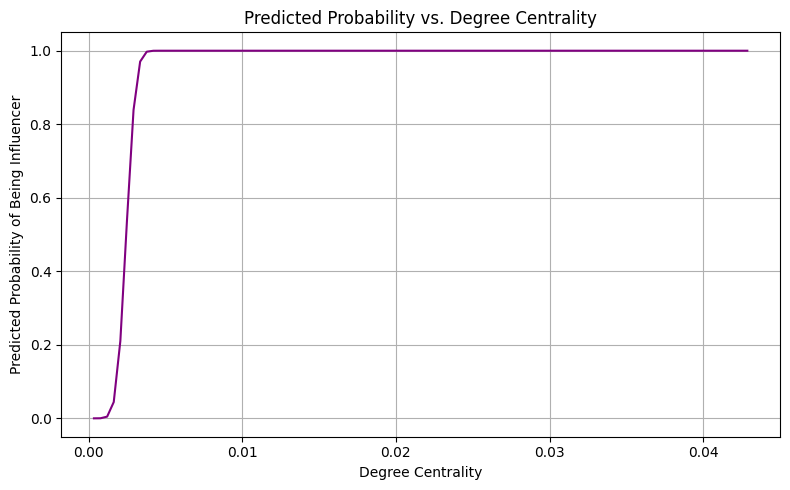

In [ ]:
X_probit = user_df[['degree_centrality', 'betweenness', 'eigenvector', 'avg_sentiment']]
y_probit = user_df['is_influencer']

# Add intercept
X_probit = sm.add_constant(X_probit)

# Fit probit model
probit_model = sm.Probit(y_probit, X_probit).fit()
print(probit_model.summary())
user_df['influencer_prob'] = probit_model.predict(X_probit)
mfx = probit_model.get_margeff()
print(mfx.summary())
import matplotlib.pyplot as plt

# Get coefficients and confidence intervals
coefs = probit_model.params[1:]  # exclude intercept
conf = probit_model.conf_int().iloc[1:]  # exclude intercept
errors = (conf[1] - conf[0]) / 2  # symmetric error bars

# Plot
plt.figure(figsize=(8, 6))
coefs.plot(kind='barh', xerr=errors, color='steelblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.title("Probit Model Coefficients – Influencer Prediction")
plt.xlabel("Coefficient Estimate")
plt.tight_layout()
plt.show()

mfx = probit_model.get_margeff()
mfx_df = mfx.summary_frame()

# Plot marginal effects
plt.figure(figsize=(8, 6))
plt.barh(mfx_df.index, mfx_df['dy/dx'], xerr=mfx_df['Std. Err.'], color='seagreen')
plt.axvline(0, color='red', linestyle='--')
plt.title("Marginal Effects on Influencer Probability (Probit Model)")
plt.xlabel("Change in Probability")
plt.tight_layout()
plt.show()



In [ ]:
marginal_effects = probit_model.get_margeff()
print(marginal_effects.summary())

       Probit Marginal Effects       
Dep. Variable:          is_influencer
Method:                          dydx
At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
degree_centrality    62.5425      4.163     15.024      0.000      54.384      70.701
betweenness          10.3863      2.292      4.531      0.000       5.893      14.879
eigenvector          -0.9263      0.200     -4.621      0.000      -1.319      -0.533
avg_sentiment        -0.0252      0.015     -1.666      0.096      -0.055       0.004


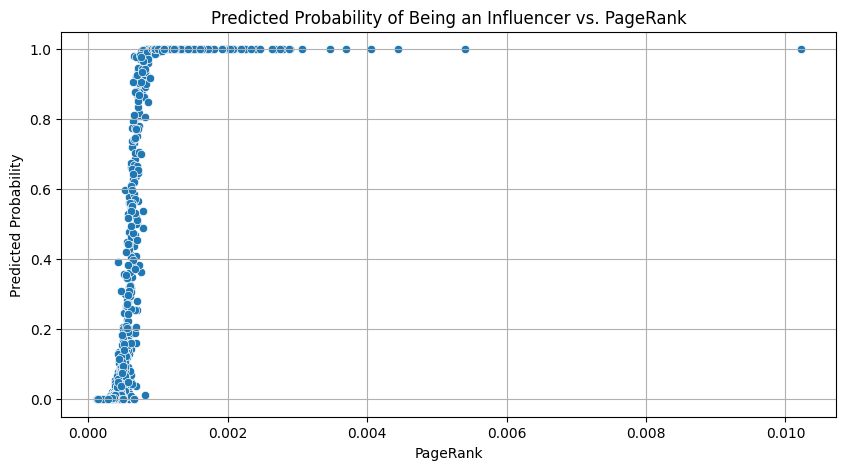

In [ ]:
user_df['probit_predicted_prob'] = probit_model.predict(X_probit)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x='pagerank', y='probit_predicted_prob', data=user_df)
plt.title('Predicted Probability of Being an Influencer vs. PageRank')
plt.xlabel('PageRank')
plt.ylabel('Predicted Probability')
plt.grid(True)
plt.show()


**added from premade code**

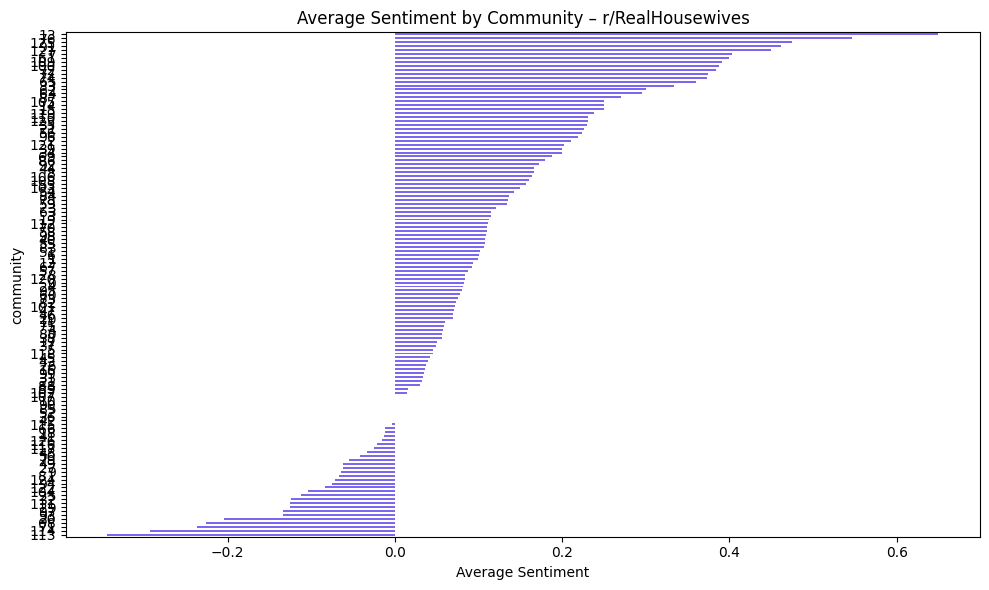

In [ ]:
# Create user → community DataFrame
user_community = pd.DataFrame(partition.items(), columns=['username', 'community'])

# Merge with sentiment
community_sentiment = user_df[['username', 'avg_sentiment']].merge(user_community, on='username')

# Average sentiment per community
sentiment_by_community = community_sentiment.groupby('community')['avg_sentiment'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sentiment_by_community.plot(kind='barh', color='mediumslateblue')
plt.xlabel("Average Sentiment")
plt.title("Average Sentiment by Community – r/RealHousewives")
plt.tight_layout()
plt.show()



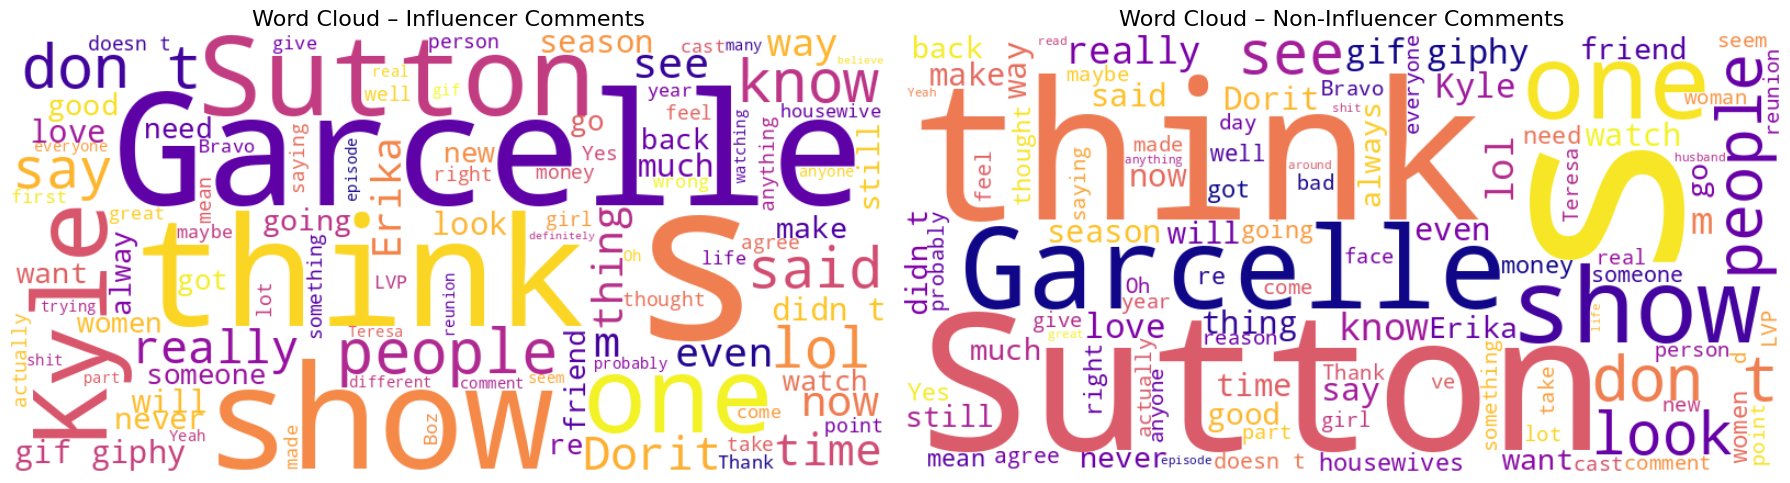

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Merge influencer flag into comments_df
comments_df['is_influencer'] = comments_df['author'].map(user_df.set_index('username')['is_influencer'])

# Filter comments with valid text and sentiment
filtered_comments = comments_df.dropna(subset=['body', 'is_influencer'])

# Split into influencer and non-influencer groups
inf_comments = filtered_comments[filtered_comments['is_influencer'] == 1]
noninf_comments = filtered_comments[filtered_comments['is_influencer'] == 0]

# Join all text into one string per group
inf_text = " ".join(inf_comments['body'].astype(str))
noninf_text = " ".join(noninf_comments['body'].astype(str))

# Define stopwords and WordCloud config
stopwords = set(STOPWORDS)
stopwords.update(['https', 'http', 'amp', 'reddit', 'com'])

wc_config = {
    "width": 800,
    "height": 400,
    "background_color": "white",
    "stopwords": stopwords,
    "max_words": 100,
    "colormap": "plasma"
}

# Generate word clouds
wc_inf = WordCloud(**wc_config).generate(inf_text)
wc_noninf = WordCloud(**wc_config).generate(noninf_text)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

axs[0].imshow(wc_inf, interpolation="bilinear")
axs[0].set_title("Word Cloud – Influencer Comments", fontsize=16)
axs[0].axis('off')

axs[1].imshow(wc_noninf, interpolation="bilinear")
axs[1].set_title("Word Cloud – Non-Influencer Comments", fontsize=16)
axs[1].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return 0.0
    return TextBlob(text).sentiment.polarity
comments_df['sentiment'] = comments_df['body'].apply(get_sentiment)


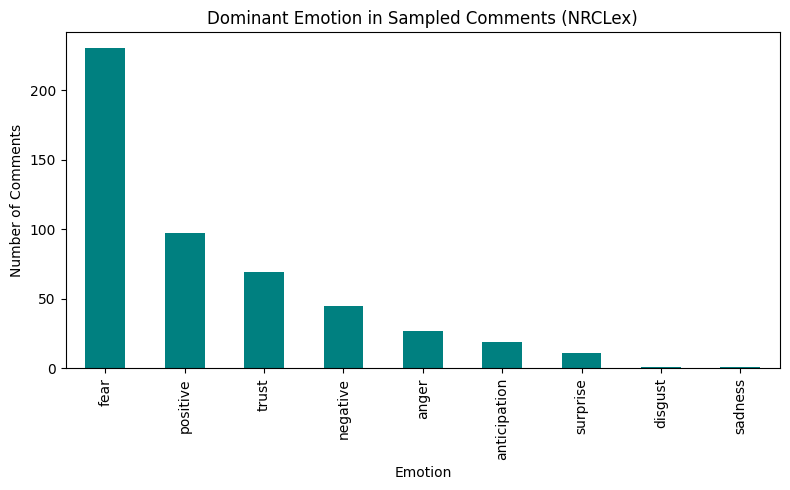

In [ ]:
!pip install nrclex
from nrclex import NRCLex

# Define function to extract dominant emotion
def get_nrc_emotion(text):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral"
    emo = NRCLex(text)
    if emo.top_emotions:
        return emo.top_emotions[0][0]  # most frequent emotion
    return "neutral"

# Sample 500 comments
comments_sample = comments_df.sample(n=500, random_state=42).copy()
comments_sample['emotion'] = comments_sample['body'].apply(get_nrc_emotion)
emotion_counts = comments_sample['emotion'].value_counts()

plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='teal')
plt.title("Dominant Emotion in Sampled Comments (NRCLex)")
plt.xlabel("Emotion")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


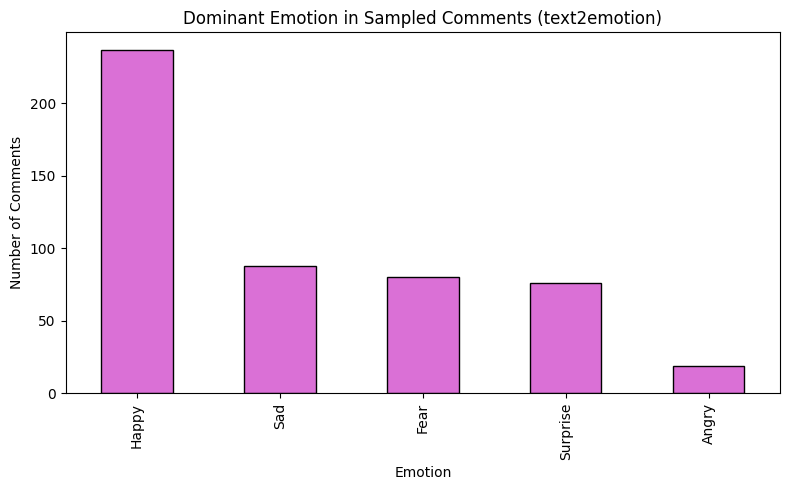

In [ ]:
!pip install text2emotion==0.0.5 emoji==1.6.3 --quiet
import text2emotion as te
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
def get_dominant_emotion(text):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral"
    emotions = te.get_emotion(text)
    return max(emotions, key=emotions.get) if emotions else "neutral"
# Sample for speed
comments_sample = comments_df.sample(n=500, random_state=42).copy()

# Run emotion detection
comments_sample['emotion'] = comments_sample['body'].apply(get_dominant_emotion)
import matplotlib.pyplot as plt

emotion_counts = comments_sample['emotion'].value_counts()

plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='orchid', edgecolor='black')
plt.title("Dominant Emotion in Sampled Comments (text2emotion)")
plt.xlabel("Emotion")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


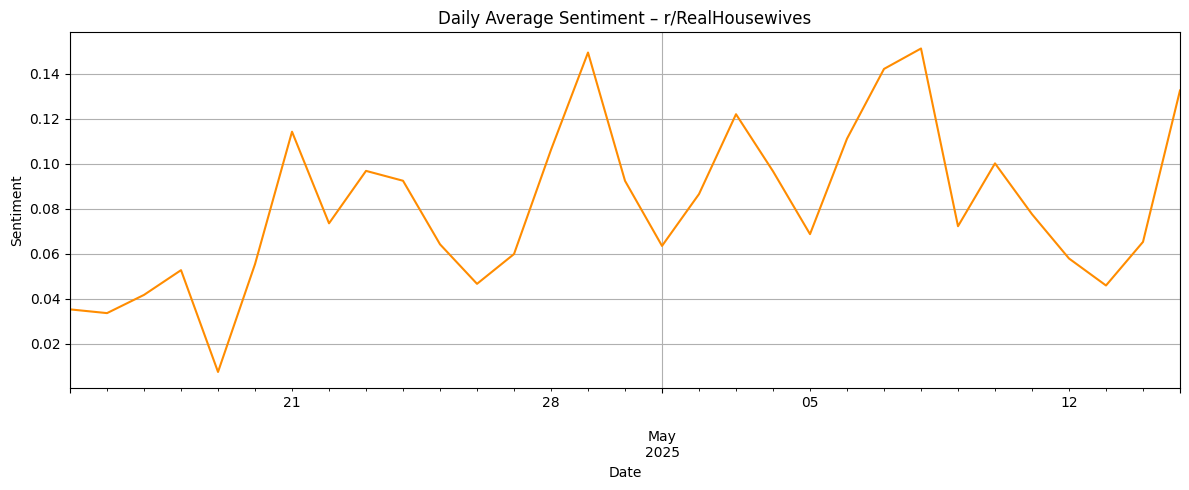

In [ ]:
comments_df['date'] = pd.to_datetime(comments_df['created_utc'], unit='s')

# Daily average sentiment
daily_sentiment = comments_df.set_index('date')['sentiment'].resample('D').mean()

plt.figure(figsize=(12, 5))
daily_sentiment.plot(color='darkorange')
plt.title("Daily Average Sentiment – r/RealHousewives")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()


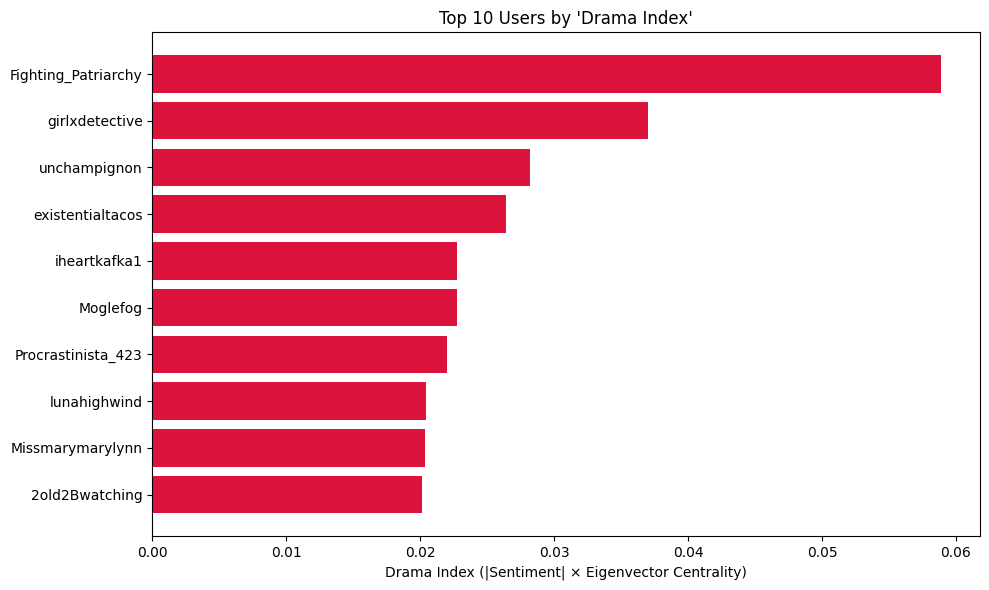

In [ ]:
# Convert your directed graph to undirected for centrality analysis
G_undirected = G.to_undirected()
pagerank_scores = nx.pagerank(G_undirected)
degree_centrality = nx.degree_centrality(G_undirected)
betweenness_centrality = nx.betweenness_centrality(G_undirected)
eigenvector_centrality = nx.eigenvector_centrality(G_undirected, max_iter=1000)
user_df = pd.DataFrame({
    'username': list(pagerank_scores.keys()),
    'pagerank': list(pagerank_scores.values()),
    'degree_centrality': [degree_centrality.get(u, 0) for u in pagerank_scores.keys()],
    'betweenness': [betweenness_centrality.get(u, 0) for u in pagerank_scores.keys()],
    'eigenvector': [eigenvector_centrality.get(u, 0) for u in pagerank_scores.keys()],
})

user_sentiment = comments_df.groupby('author')['sentiment'].mean()
user_df['avg_sentiment'] = user_df['username'].map(user_sentiment).fillna(0)

threshold = user_df['pagerank'].quantile(0.90)
user_df['is_influencer'] = (user_df['pagerank'] >= threshold).astype(int)

# Add drama index
user_df['drama_index'] = user_df['avg_sentiment'].abs() * user_df['eigenvector']
# Drama Index = |sentiment| × eigenvector
user_df['drama_index'] = user_df['avg_sentiment'].abs() * user_df['eigenvector']

# View top drama users
top_drama = user_df.sort_values('drama_index', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_drama['username'], top_drama['drama_index'], color='crimson')
plt.gca().invert_yaxis()
plt.title("Top 10 Users by 'Drama Index'")
plt.xlabel("Drama Index (|Sentiment| × Eigenvector Centrality)")
plt.tight_layout()
plt.show()



In [ ]:
!pip install pyvis

from pyvis.network import Network
from IPython.display import IFrame

# Create and configure the network
net = Network(height='700px', width='100%', notebook=True, cdn_resources='in_line')
net.force_atlas_2based()

# Add nodes and edges
for node in G.nodes():
    net.add_node(node, title=node, size=5 + pagerank_scores.get(node, 0) * 5000)

for source, target in G.edges():
    net.add_edge(source, target)

# Save and display
net.show("rhousewives_network.html")
IFrame("rhousewives_network.html", width="100%", height="700px")



rhousewives_network.html


In [ ]:
net.show("rhousewives_network.html")
import webbrowser
from google.colab import files
files.download("rhousewives_network.html")



rhousewives_network.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>